# PyTorch with The Fashion MINST Dataset (Simple Project)

This notebook contains the steps for building deep neural network using PyTorch and the fashion Minst dataset where it takes an image of clothes as input and predict its class.

## Table of Contents
#####  First Training 
  - Import The Relevant Packages
  - Download and Prepare The Dataset
  - Build a Class to Fetch The Dataset
  - Define The Model, Loss Function, and Optimizer
  - Define a Training Function
  - Define an Evaluation Funtion
  - Train the Network
  - Display the Variation of the Training Loss and Accuracy
  - Results and Conclusion

### 1.1 Import The Relevant Packages

In [15]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Train on cuda if GPU is available

### 1.2 Download and Prepare The Dataset

In [16]:
from torchvision import datasets
data_folder = ".\Datasets\FMNIST"                         #can be any directory to download the dataset
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [17]:
train_images = fmnist.data                                #training images 
train_targets = fmnist.targets                            #images labels (classes)

In [18]:
print(f"Number of training images {train_images.shape[0]}")
print(f"Number of classess {len(train_targets.unique())}")
print(f"The classess {fmnist.classes}")

Number of training images 60000
Number of classess 10
The classess ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


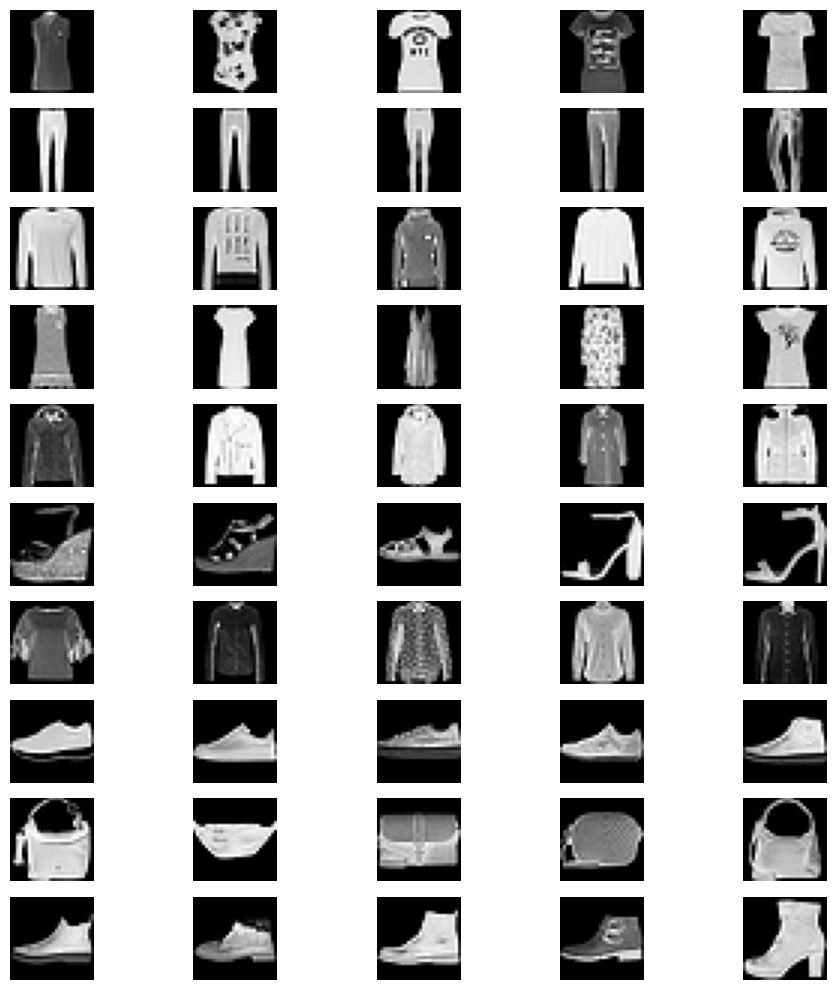

In [19]:
#Create a plot of 10*5 grid where each row belongs to a class to visualize the dataset
row,col = len(train_targets.unique()) , 5
fig, ax = plt.subplots(row,col, figsize = (10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(train_targets == label_class)[0]
    
    for plot_cell in plot_row:
        plot_cell.grid(False)
        plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x= train_images[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

### 1.3 Build a Class to Fetch The Dataset

In [20]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        x= x.float()                #convert the images to a float point numbers
        x = x.view(-1,28*28)        #flatten each image
        self.x , self.y = x,y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,index):
        x,y = self.x[index], self.y[index]
        return x.to(device), y.to(device)       #resgister the input and the output data to the device "cuda" to train on GPU

In [21]:
train_data = FMNISTDataset(train_images,train_targets) 
#use Dataloader to sample 32 data points randomly for each batch size
train_data_loader = DataLoader(train_data, batch_size=32, shuffle=True) 

### 1.4 Define The Model, Loss Function, and Optimizer

In [22]:
#Create a model with one hidden layer (1000 neurons) and the output is a 10-neuron layer to predict the 10 classess
model = nn.Sequential(
            nn.Linear(28 * 28, 1000),
            nn.ReLU(),
            nn.Linear(1000,10)
                     ).to(device)

In [23]:
loss_function = nn.CrossEntropyLoss()

In [24]:
optimizer = SGD(model.parameters(), lr = 1e-2)   #initialize the learning rate to 0.01

### 1.5 Define a Training Function

In [25]:
def train_batch(input_batch, targets, model, loss_function, optimizer):
    model.train()                                        
    predictions = model(input_batch)                     #perfom forward propagation
    batch_loss = loss_function(predictions,targets)      #compute the loss value 
    batch_loss.backward()                                #perfom backward propagation
    optimizer.step()                                     #calculate new weights
    optimizer.zero_grad()                                #flush the gradients for next batch of calculations
    
    return batch_loss.item()                             #return the loss value
      

### 1.6 Define an Evaluation Funtion 

In [26]:
@torch.no_grad()                       #disable the gradients calculation
def get_accuracy(input_batch, targets, model):
    model.eval()
    predictions = model(input_batch)              #perfom forward propagation
    max_values, argmaxes = predictions.max(-1)    #get argmax index for each row
    is_correct = argmaxes ==targets               #compare argmax with tragets to check that each row predicts correctly
    
    return is_correct.cpu().numpy().tolist()      #return the result,register it to the cpu, and convert it to numpy array

### 1.7 Train the Network

In [49]:
losses, accuracies = [], []                       # define lists to contain the loss and accuracy values of each epoch
for epoch in range (10):                         #define the number of the epochs
    print(f"Epoch: {epoch+1}")
    batch_losses, batch_accuracies = [],[]       #define lists to contain the loss and accuracy values of each batch
    
    for ix, batch in enumerate(iter(train_data_loader)): #create batches of training data by iterating thorugh data loader
        input_batch, targets = batch                     #unpack the batch 
        batch_loss = train_batch(input_batch, targets, model,loss_function, optimizer)  #train the batch
        
        batch_losses.append(batch_loss)                               #store the loss value of each batch
    epoch_loss = np.array(batch_losses).mean()                        #get the mean of the loss values of all batches
    losses.append(epoch_loss)
    print(f"Train Loss: {epoch_loss:0.3f}")
    
    for ix, batch in enumerate(iter(train_data_loader)):
        input_batch, targets = batch
        is_correct = get_accuracy(input_batch, targets, model)
        
        batch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(batch_accuracies)
    accuracies.append(epoch_accuracy)
    print(f"Train Accuracy: {epoch_accuracy*100:0.0f}%")
    print('<--------------------------------------------------------->')

    

Epoch: 1
Train Loss: 2.266
Train Accuracy: 13%
<--------------------------------------------------------->
Epoch: 2
Train Loss: 2.289
Train Accuracy: 10%
<--------------------------------------------------------->
Epoch: 3
Train Loss: 2.258
Train Accuracy: 14%
<--------------------------------------------------------->
Epoch: 4
Train Loss: 2.255
Train Accuracy: 13%
<--------------------------------------------------------->
Epoch: 5
Train Loss: 2.216
Train Accuracy: 13%
<--------------------------------------------------------->
Epoch: 6
Train Loss: 2.204
Train Accuracy: 15%
<--------------------------------------------------------->
Epoch: 7
Train Loss: 2.195
Train Accuracy: 14%
<--------------------------------------------------------->
Epoch: 8
Train Loss: 2.202
Train Accuracy: 15%
<--------------------------------------------------------->
Epoch: 9
Train Loss: 2.207
Train Accuracy: 15%
<--------------------------------------------------------->
Epoch: 10
Train Loss: 2.215
Train Acc

### 1.8 Display the Variation of the Training Loss and Accuracy

/tmp/ipykernel_1653/1763296980.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


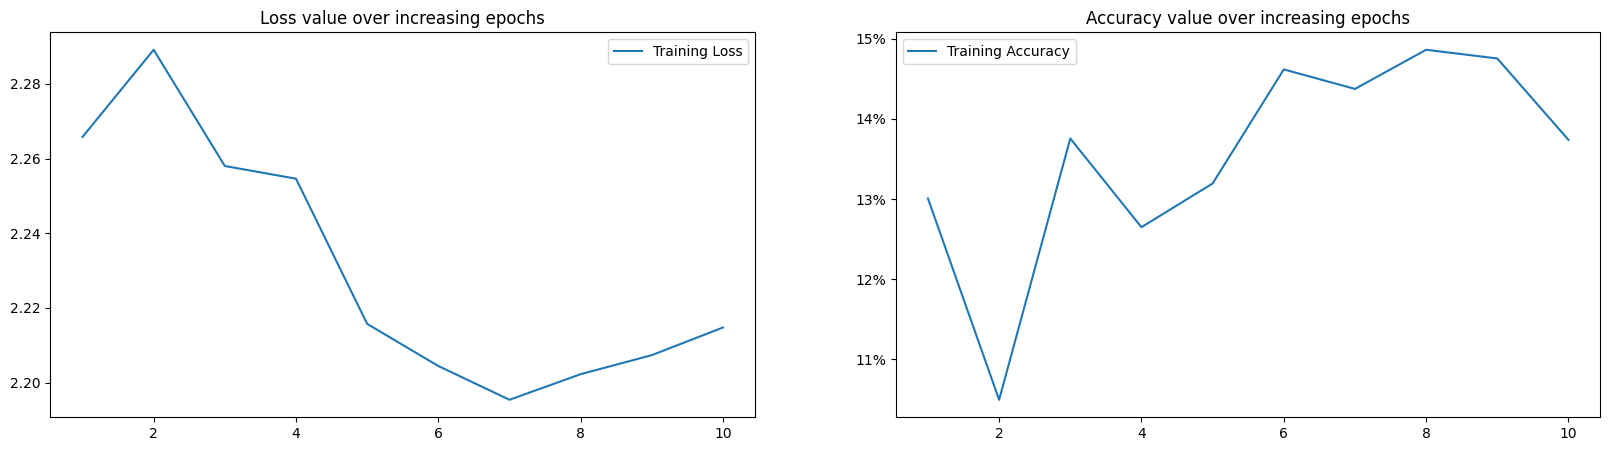

In [53]:
epochs = np.arange(10)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()

### 1.9 Results and Conclusion

 1. The training accuracy is about 13% at the end of ten epochs
 2. The loss value did not decrease considerably over the increasing numbers of epochs
 
 ##### so we will try to change the hyperparameters to see their impact on the training accuarcy and the loss value 